In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#feature importance graphing function
def f_importances(importances, names):
    indices = np.argsort(importances)[::-1]
    print(indices)
    plt.figure()
    plt.subplots(figsize=(20,20))
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), names[indices], rotation=90)
    plt.show()



df = pd.read_csv("C:\\Users\Eric\Desktop\crash_data_one_hot_encoded_MLP.csv")
df = sklearn.utils.shuffle(df)
df.fillna(0,inplace=True)
encode = LabelEncoder()

features = ['CRASH_YEAR', 'NUM_LANES', 'SPD_LIM', 'MULTI_VEH_CODE','HOLIDAY_CODE',
            'LG_REGION_DESC_CODE', 'JUNCTION_TYPE_CODE', 'DIRN_ROLE1_DESC_CODE','INTSN_MIDBLOCK_CODE',
            'FLAT_HILL_CODE','ROAD_CURVATURE_CODE','ROAD_MARKINGS_CODE','ROAD_SURFACE_CODE','ROAD_WET_CODE',
            'URBAN_CODE','LIGHT_CODE','STREET_LIGHT_CODE','WEATHER_A_CODE']

df_non_injury = df[df.CRASH_SEV_CODE==2]  # 480452 samples
df_minor = df[df.CRASH_SEV_CODE==1]       # 150834 samples
df_serious = df[df.CRASH_SEV_CODE==3]    # 37347  samples
df_fatal = df[df.CRASH_SEV_CODE==0]       # 6178   samples

df_minor_upsampled = resample(df_minor, replace=True,n_samples=480452,random_state=40)
df_serious_upsampled = resample(df_serious, replace=True,n_samples=480452,random_state=40)
df_fatal_upsampled = resample(df_fatal, replace=True,n_samples=480452,random_state=40)

df_upsampled = pd.concat([df_non_injury, df_minor_upsampled, df_serious_upsampled, df_fatal_upsampled])
df_upsampled.CRASH_SEV_CODE.value_counts()
df_upsampled.head()

,CRASH_YEAR,NUM_LANES,SPD_LIM,TRAFFIC_CTRL_Give Way Sign,TRAFFIC_CTRL_Nil,TRAFFIC_CTRL_Points Man,TRAFFIC_CTRL_School Patrol,TRAFFIC_CTRL_Stop Sign,TRAFFIC_CTRL_Traffic Signal,MULTI_VEH_Cyclist(s)+Pedestrian(s) only,...,STREET_LIGHT_Off,STREET_LIGHT_On,STREET_LIGHT_Unknown,WEATHER_A_Fine,WEATHER_A_Heavy Rain,WEATHER_A_Light Rain,WEATHER_A_Mist,WEATHER_A_Snow,WEATHER_A_Unknown,CRASH_SEV_CODE
488355,2013,8,50,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,2
639463,2017,2,50,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,2
530136,2014,2,50,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,2
123544,2003,2,50,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2
629998,2017,2,50,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,2


In [24]:
X = df_upsampled.drop(["CRASH_SEV_CODE","CRASH_YEAR"], axis=1).values
y = df_upsampled["CRASH_SEV_CODE"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = DecisionTreeClassifier(random_state = 40)

print(X_train.shape); print(X_test.shape)


(1729627, 91)
(192181, 91)


In [25]:

start = time.time()
clf.fit(X_train,y_train)
stop = time.time()

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)
print(f"\n Training time: {stop - start}s")
print("\n training data\n")
print(confusion_matrix(y_train,predict_train))
print("\n")
print(classification_report(y_train,predict_train,labels=pd.unique(predict_train)))
print("\n---------------------------------------------------------------------------------------\n")
print("\n test data\n")
print(confusion_matrix(y_test,predict_test))
print("\n")
print(classification_report(y_test,predict_test,labels=pd.unique(predict_test)))


 Training time: 42.63268566131592s

 training data

[[424341   1206   1720   5133]
 [ 22252 315753  49431  45031]
 [ 15098  57044 328490  32000]
 [ 30680  18626  16308 366514]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.92    432400
           1       0.80      0.73      0.77    432467
           2       0.83      0.76      0.79    432632
           3       0.82      0.85      0.83    432128

    accuracy                           0.83   1729627
   macro avg       0.83      0.83      0.83   1729627
weighted avg       0.83      0.83      0.83   1729627


---------------------------------------------------------------------------------------


 test data

[[47097   124   236   595]
 [ 2532 33042  6970  5441]
 [ 2068 10883 29802  5067]
 [ 3385  2259  1998 40682]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.91     48052
           3       0.79      0.84      0.81     48324
        

[ 1  0 10 46 47 49 45 60 52 78 76 58 55 23 53 56 13  3 87 85 70 61 20 34
 41 81 62 77 73 25 35 28 65 24  2 84 82 30 40 27 79 86 57 17 29 63 31  6
 42 83 33 32 50 51  7 88 37 18 21 15 36 26 67 19 14 39 69 75 43 64 74 90
 71 38  9 66 16 89 72 54 80  5 11  8  4 22 12 48 44 59 68]


<Figure size 432x288 with 0 Axes>

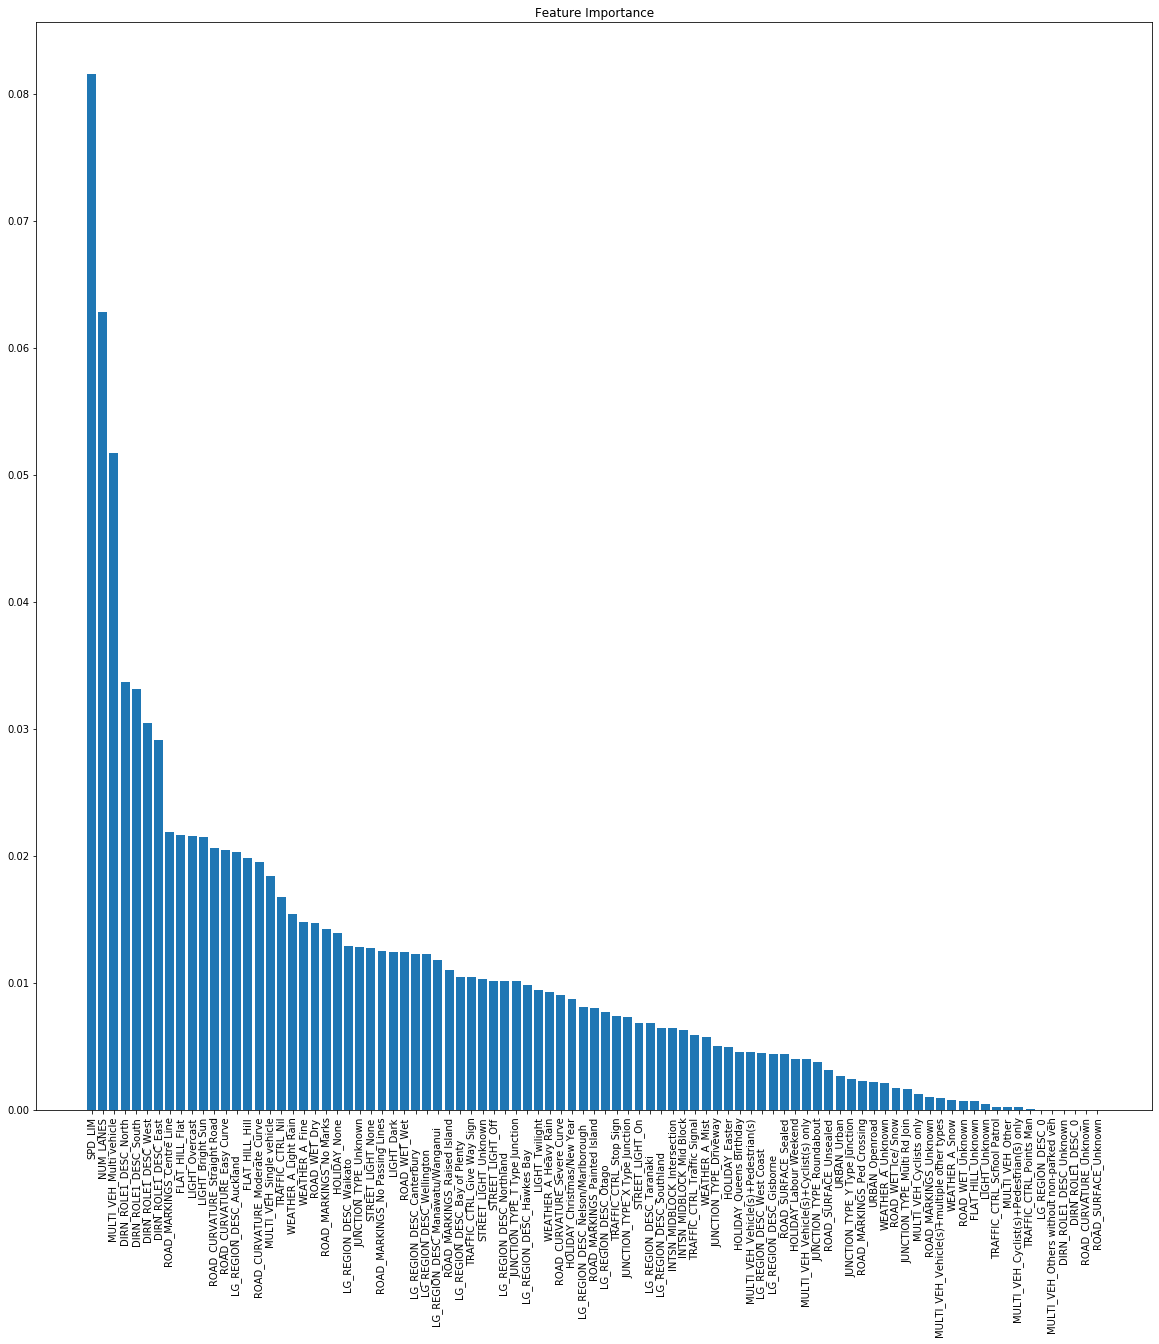

In [35]:
df_noYear = df_upsampled.drop(["CRASH_YEAR"], axis=1)
f_importances(clf.feature_importances_, df_noYear.columns.values)

In [42]:
# From this cell and below, random forests are used
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(random_state=40,verbose = True,n_jobs = -1)


In [43]:
start = time.time()
clf2.fit(X_train,y_train)
stop = time.time()

predict_train = clf2.predict(X_train)
predict_test = clf2.predict(X_test)
print(f"\n Training time: {stop - start}s")
print("\n training data\n")
print(confusion_matrix(y_train,predict_train))
print("\n")
print(classification_report(y_train,predict_train,labels=pd.unique(predict_train)))
print("\n---------------------------------------------------------------------------------------\n")
print("\n test data\n")
print(confusion_matrix(y_test,predict_test))
print("\n")
print(classification_report(y_test,predict_test,labels=pd.unique(predict_test)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   24.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.6s finished



 Training time: 155.4733386039734s

 training data

[[424341   1143   1720   5196]
 [ 22252 309679  54292  46244]
 [ 15098  51568 332995  32971]
 [ 30680  17426  15951 368071]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.92    432400
           1       0.82      0.72      0.76    432467
           2       0.82      0.77      0.80    432632
           3       0.81      0.85      0.83    432128

    accuracy                           0.83   1729627
   macro avg       0.83      0.83      0.83   1729627
weighted avg       0.83      0.83      0.83   1729627


---------------------------------------------------------------------------------------


 test data

[[47097   123   236   596]
 [ 2512 32104  7901  5468]
 [ 1839  8801 33008  4172]
 [ 3385  2096  1972 40871]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.92     48052
           3       0.80      0.85      0.82     48324
        

[ 0  1 46 47 10 49 45  3 60 58 23 52 53 78 56 55 15 76 34 75 74 25 61 81
 13 20 85 87 24 28 35 70 65 62 73 30 77 31 27 40  2 63 41 84 82 29 14 17
 79 86 33 57 32  6 42 83 37 50  7 51 88 18 36 26 21 19 69 67 39 64 43 90
 71 38  9 16 66 54 89 72 80 11  8  5  4 12 22 48 44 68 59]


<Figure size 432x288 with 0 Axes>

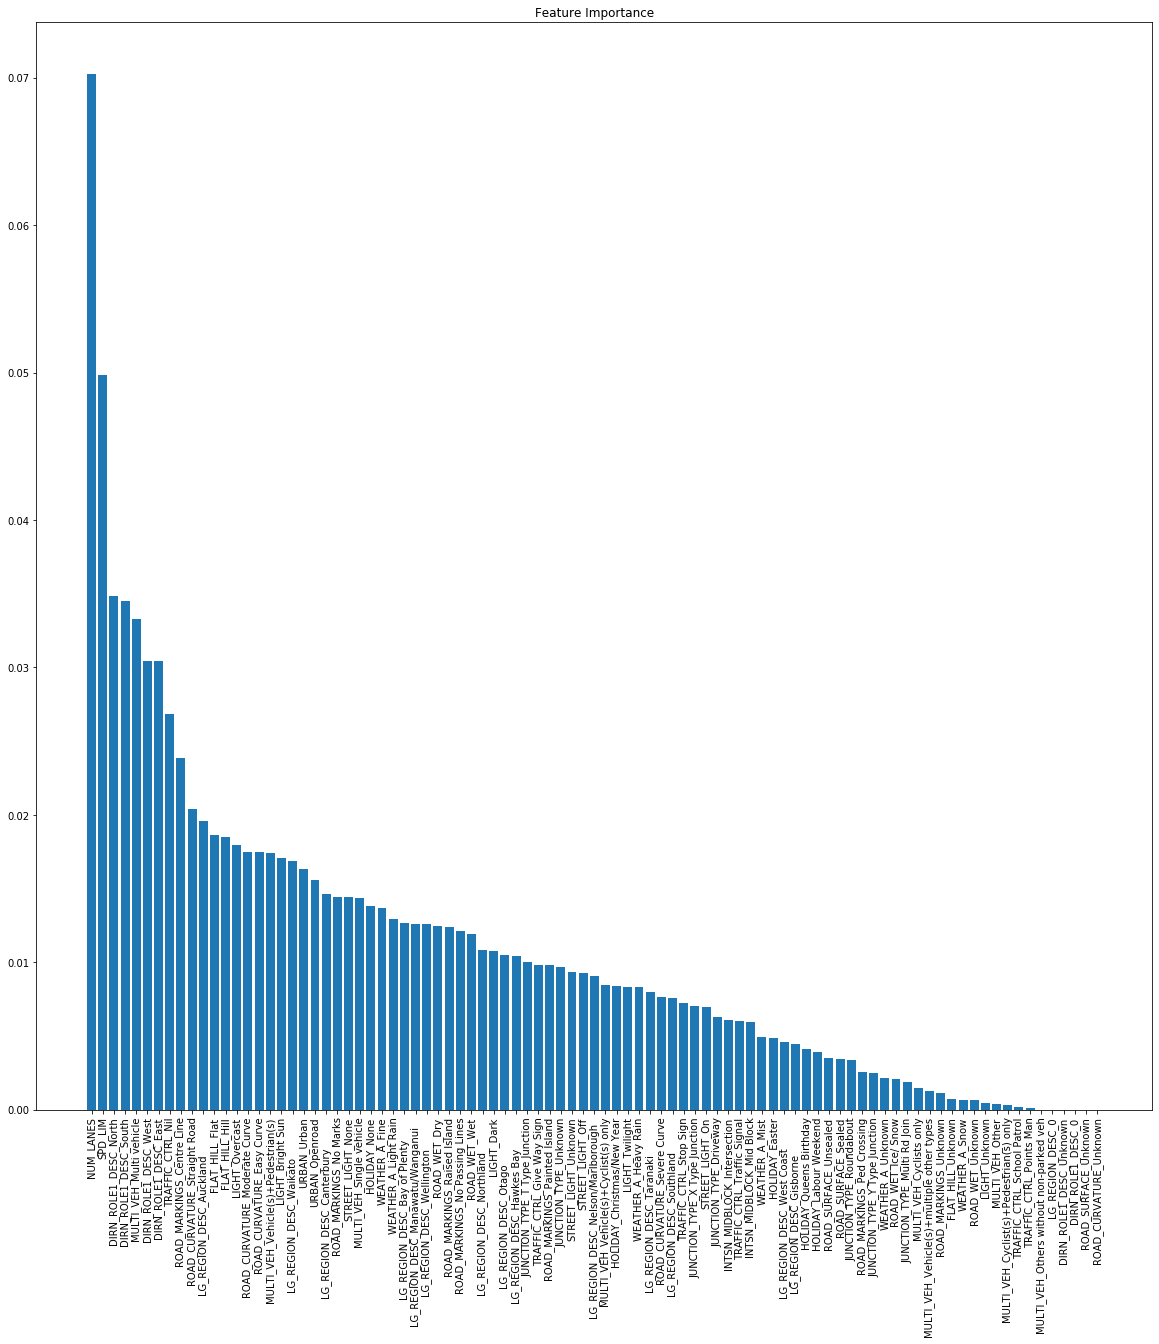

In [44]:
df_noYear = df_upsampled.drop(["CRASH_YEAR"], axis=1)
f_importances(clf2.feature_importances_, df_noYear.columns.values)